In [599]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, auc, f1_score

In [600]:
df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv", dtype={'ID':'category', 
                                                              'Family':'category', 
                                                              'Education':'category', 
                                                              'ZIP Code' : 'category'})

In [601]:
df.shape

(5000, 14)

In [602]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null category
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null category
Family                5000 non-null category
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: category(4), float64(1), int64(9)
memory usage: 642.9 KB


# [Section-A] - Exploratory Data Analysis

In [603]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,5000,5000,999,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,5000,NaN,NaN,NaN,45.3384,11.4632,23,35,45,55,67
Experience,5000,NaN,NaN,NaN,20.1046,11.468,-3,10,20,30,43
Income,5000,NaN,NaN,NaN,73.7742,46.0337,8,39,64,98,224
ZIP Code,5000,467,94720,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family,5000,4,1,1472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCAvg,5000,NaN,NaN,NaN,1.93794,1.74766,0,0.7,1.5,2.5,10
Education,5000,3,1,2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,5000,NaN,NaN,NaN,56.4988,101.714,0,0,0,101,635
Personal Loan,5000,NaN,NaN,NaN,0.096,0.294621,0,0,0,0,1


## Age

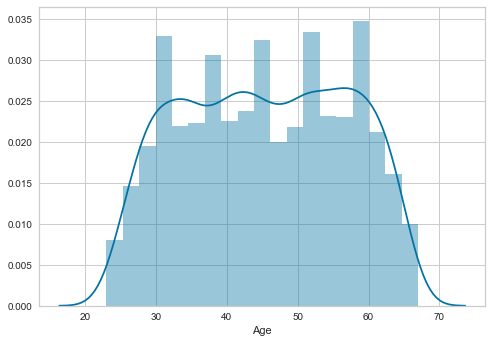

In [604]:
sns.distplot(df["Age"])

In [605]:
st.skew(df['Age']), st.kurtosis(df['Age'])

(-0.029331878574766698, -1.1531142779719183)

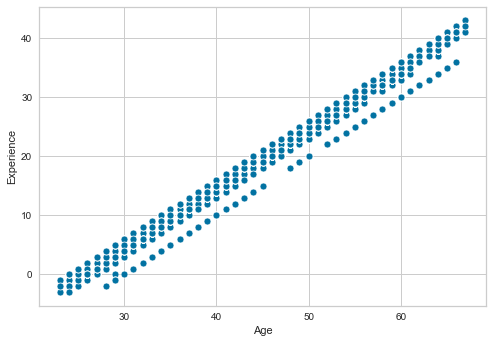

In [606]:
sns.scatterplot(x="Age", y="Experience", data=df)
# Pretty obvious that Age and Experience would have good correlation

In [607]:
# Including a new column - Age Range, that classifies the given record to a particular Age Range group.
bins = [21, 25, 30, 35, 40, 45, 50, 55, 60, 65, 100]
labels = ['21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+']
df['Age Range'] = pd.cut(df['Age'], bins, labels = labels, include_lowest = True)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age Range
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,21-25
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,41-45
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,36-40
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,31-35
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,31-35


In [608]:
(df['Age Range'].value_counts(normalize=True)).sort_index()
# Bank has most customers in age range 26 to 65. 
# Across each 5 year age range more or less there are similar number of customers.

21-25    0.0186
26-30    0.1062
31-35    0.1300
36-40    0.1172
41-45    0.1318
46-50    0.1222
51-55    0.1308
56-60    0.1338
61-65    0.1022
66+      0.0072
Name: Age Range, dtype: float64

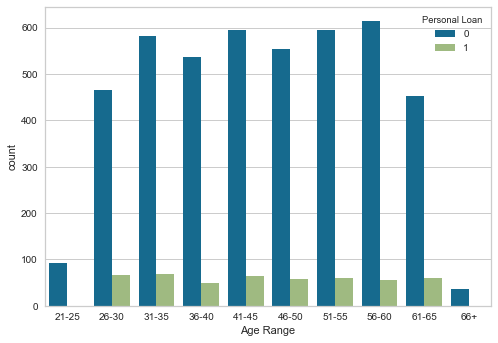

In [609]:
sns.countplot(x='Age Range', hue='Personal Loan', data=df)
# People from Age Range 26 to 65 are generally the one who borrow money
# Small observation : People in early thirties have slightly more personal loan requirement than late thirties.
# Similarly for early fourties & early fifties have slightly more personal loan requirement than late fourties and 
# late fities respectively. The trend continues even in early sixties.

In [610]:
pd.crosstab(index=df['Age Range'], columns=df['Personal Loan'], normalize=True)

Personal Loan,0,1
Age Range,,
21-25,0.0186,0.0000
26-30,0.0930,0.0132
31-35,0.1164,0.0136
36-40,0.1072,0.0100
41-45,0.1190,0.0128
46-50,0.1106,0.0116
51-55,0.1188,0.0120
56-60,0.1228,0.0110
61-65,0.0904,0.0118


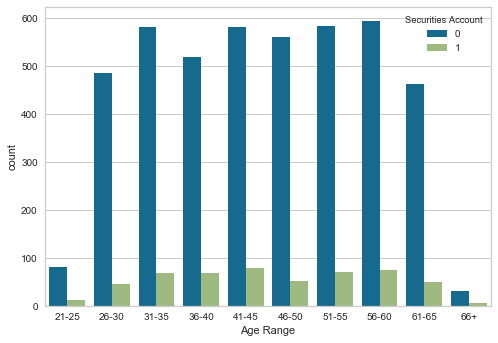

In [611]:
sns.countplot(x='Age Range', hue='Securities Account', data=df)

,Age,Income
Age,1.000000,-0.055269
Income,-0.055269,1.000000


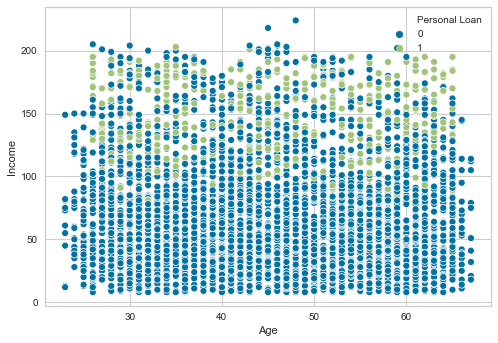

In [612]:
sns.scatterplot(x='Age', y='Income', hue = 'Personal Loan', data=df)
df[['Age', 'Income']].corr()
# It's weak correlation between Age and Income
# Across different ages, more people in higher income group (Over 100K) take Personal Loan

,Age,CCAvg
Age,1.000000,-0.052012
CCAvg,-0.052012,1.000000


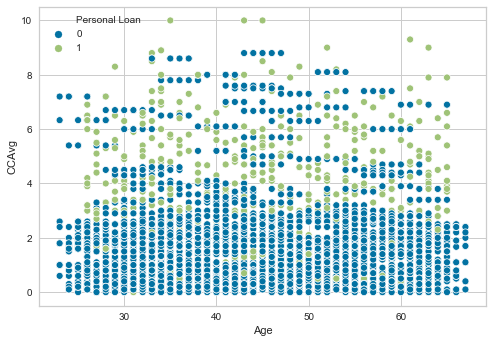

In [613]:
sns.scatterplot(x='Age', y='CCAvg', hue = 'Personal Loan', data=df)
# It's a weak correlation between Age and CCAvg
# Across diffeent ages, more people with higher CreditCard spending (approximately above 3K) go for Personal Loan
df[['Age', 'CCAvg']].corr()

,Age,Mortgage
Age,1.000000,-0.012539
Mortgage,-0.012539,1.000000


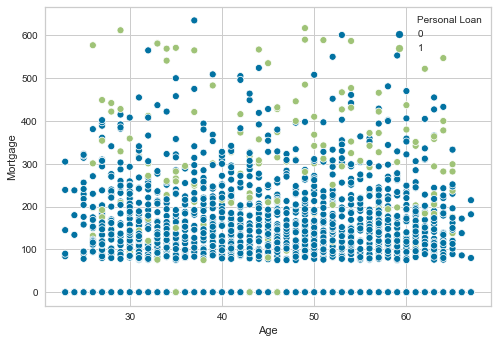

In [614]:
sns.scatterplot(x='Age', y='Mortgage', hue = 'Personal Loan', data=df)
# It's a weak correlation between Age and Mortgage
# Across different ages, more people with Mortgage above 200K go for Personal Loan
df[['Age', 'Mortgage']].corr()

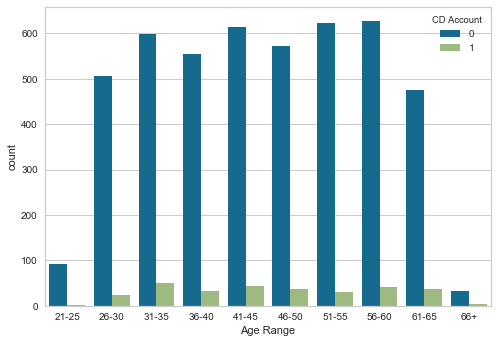

In [615]:
sns.countplot(x='Age Range', hue='CD Account', data=df)
# Across Age Ranges there are less number of CD Accounts

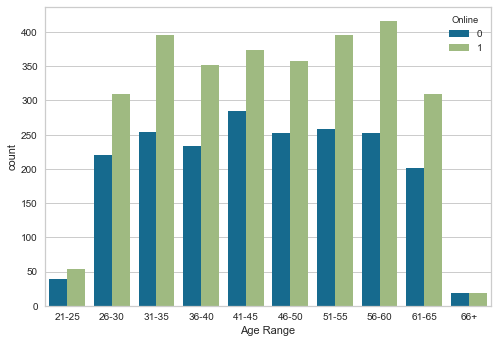

In [616]:
sns.countplot(x='Age Range', hue='Online', data=df)
# Across age groups, people using Online banking are more compared to the ones not using Online

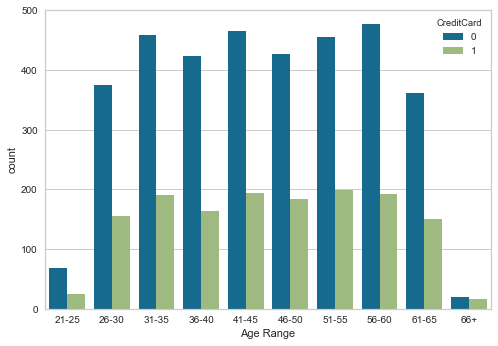

In [617]:
sns.countplot(x='Age Range', hue='CreditCard', data=df)
# Across age groups, there are less number of CreditCard users

## Experience

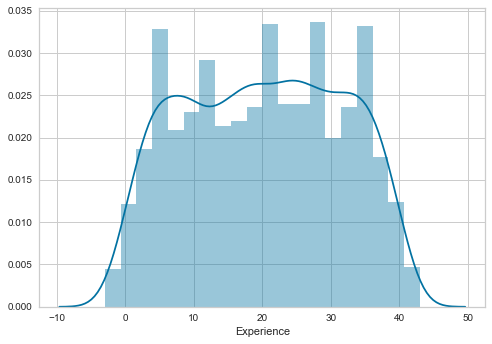

In [618]:
sns.distplot(df['Experience'])

In [619]:
st.skew(df['Experience'])

-0.026316790337654442

In [620]:
# Including a new column - Experience Range, that classifies the given record to a particular Experience Range group.
bins = [1, 10, 20, 30, 40, 90]
labels = ['1-10', '11-20', '21-30', '31-40', '41+']
df['Experience Range'] = pd.cut(df['Experience'], bins, labels = labels, include_lowest = True)
df.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age Range,Experience Range
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,21-25,1-10
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,41-45,11-20
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,36-40,11-20
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,31-35,1-10
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,31-35,1-10


In [621]:
pd.crosstab(index=df['Experience Range'], columns=df['Personal Loan'])
# People with 1 to 40 years experience go for Personal Loans.
# With people in 1-10 years Experience Range, have more need for Personal Loan. Other Age Range groups also have 
# nearly close need for Personal Loan.

Personal Loan,0,1
Experience Range,,
1-10,1045,126
11-20,1135,118
21-30,1182,119
31-40,1000,103
41+,47,7


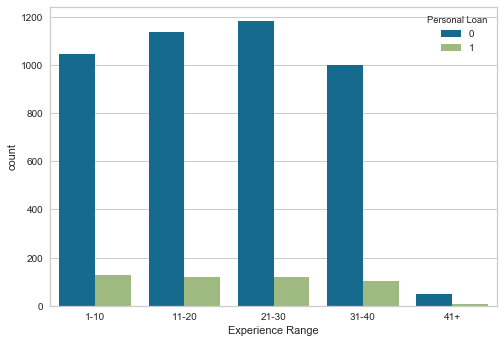

In [622]:
sns.countplot(x='Experience Range', hue='Personal Loan', data=df)

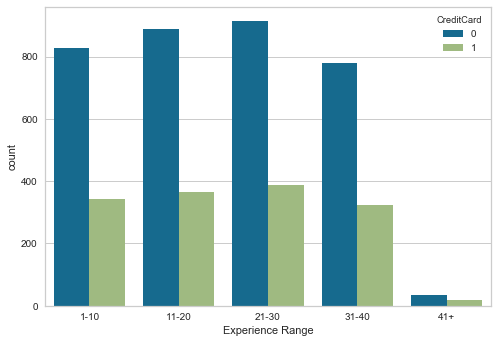

In [623]:
sns.countplot(x='Experience Range', hue='CreditCard', data=df)

In [624]:
# There are a few bad values (-ve Experience) in Experience field but since Experience doesn't have high correlation with 
# Personal Loan, we will not use this field in Model building. Hence we would not fix the bad data in this field.

## Income

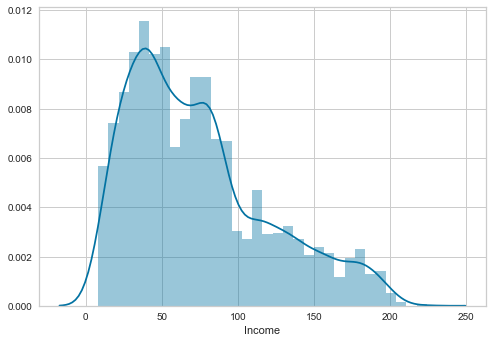

In [625]:
sns.distplot(a=df['Income'])

In [626]:
# Clearly this Income data is right skewed
# High Income bars between 40K to 80K

In [627]:
st.skew(df['Income'])

0.8410861846424931

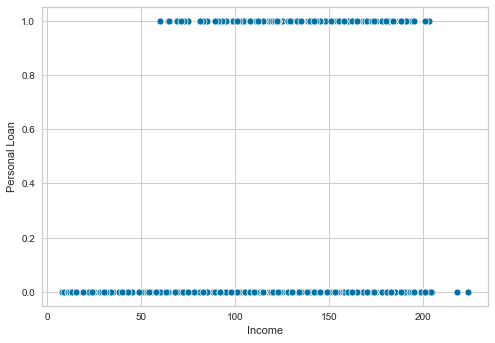

In [628]:
sns.scatterplot(x='Income', y='Personal Loan', data=df)
# More people with Income approximately Over 60K take Personal Loan

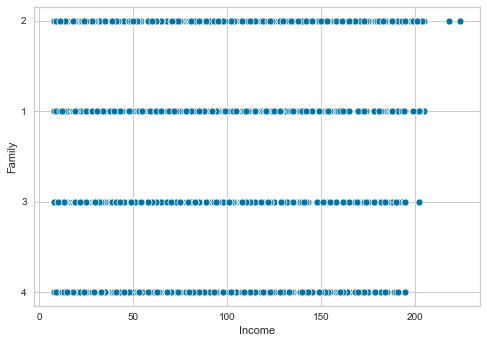

In [629]:
sns.scatterplot(x='Income', y='Family', data=df)
# Looks like Family Size is not highly correlated with Income
# People have families of different sizes irrespective of their level of income

,Income,CCAvg
Income,1.000000,0.645984
CCAvg,0.645984,1.000000


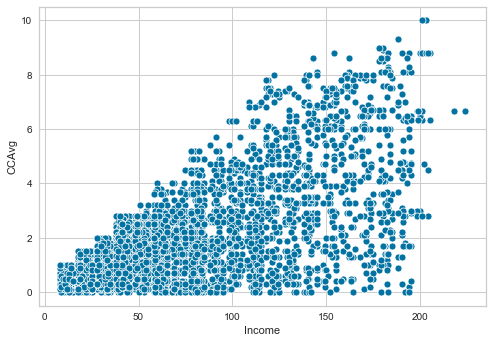

In [630]:
sns.scatterplot(x='Income', y='CCAvg', data=df)
df[['Income', 'CCAvg']].corr()
# There is a positive correlation between Income and CCAvg
# People generally tend to spend more with more income

,Income,Mortgage
Income,1.000000,0.206806
Mortgage,0.206806,1.000000


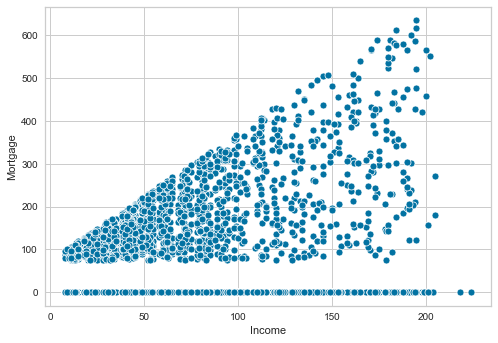

In [631]:
sns.scatterplot(x='Income', y='Mortgage', data=df)
df[['Income', 'Mortgage']].corr()
# Not a very strong correlation between Income and Mortgage but there is some evidence that people tend to go for higher 
# Mortgage with higher Incomes

In [632]:
# Including a new column - Income Range, that classifies the given record to a particular Income Range group.
bins = [1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 500]
labels = ['1-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121-140', '141-160', '161-180', '180+']
df['Income Range'] = pd.cut(df['Income'], bins, labels = labels, include_lowest = True)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age Range,Experience Range,Income Range
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,21-25,1-10,41-60
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,41-45,11-20,21-40
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,36-40,11-20,1-20
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,31-35,1-10,81-100
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,31-35,1-10,41-60


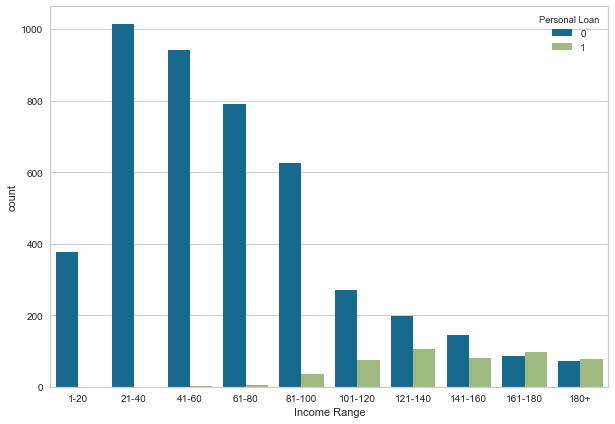

In [633]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Income Range', hue='Personal Loan', data=df)
# Again another evidence that people with 60K and more Income go for Personal Loan.
# With highest Personal Loan takers in Income Range 121-140K

## CCAvg

,CCAvg,Personal Loan
CCAvg,1.000000,0.366889
Personal Loan,0.366889,1.000000


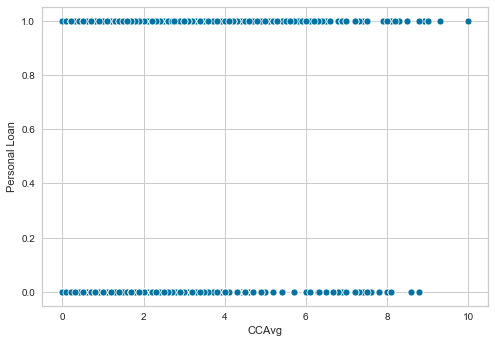

In [634]:
# We already know that more people with higher CreditCard spending (approximately above 3K) go for Personal Loan
sns.scatterplot(x='CCAvg', y='Personal Loan', data=df)
df[['CCAvg', 'Personal Loan']].corr()

,CCAvg,Mortgage
CCAvg,1.000000,0.109905
Mortgage,0.109905,1.000000


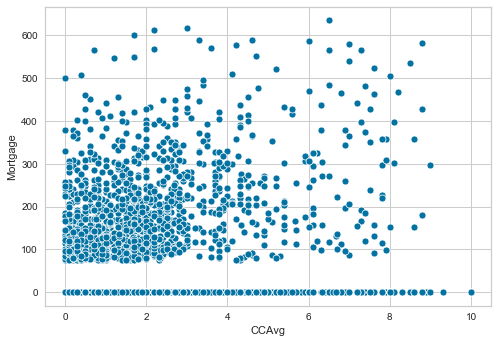

In [635]:
sns.scatterplot(x='CCAvg', y='Mortgage', data=df)
df[['CCAvg', 'Mortgage']].corr()
# It's relatively weak correlation between CCAvg and Mortgage

## Education

In [636]:
pd.crosstab(index=df['Education'], columns=df['Personal Loan'], normalize=True)
# There are more people with Education Level 2 (Graduate) & Education Level 3 (Professional) going for Personal Loans

Personal Loan,0,1
Education,,
1,0.4006,0.0186
2,0.2442,0.0364
3,0.2592,0.0410


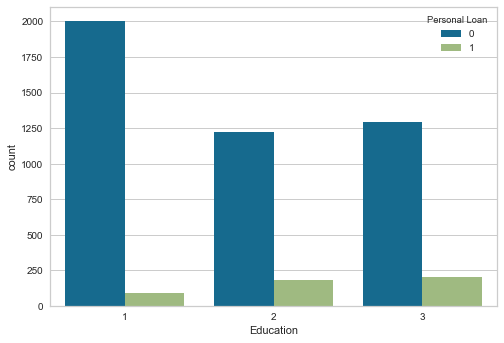

In [637]:
sns.countplot(x='Education', hue='Personal Loan', data=df)

## Mortgage

,Personal Loan,Mortgage
Personal Loan,1.000000,0.142095
Mortgage,0.142095,1.000000


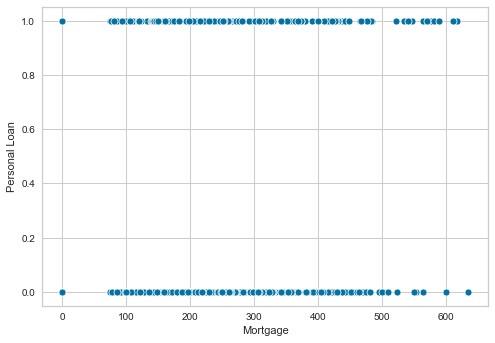

In [638]:
sns.scatterplot(x='Mortgage', y='Personal Loan', data=df)
df[['Personal Loan', 'Mortgage']].corr()
# Mortgage has some correlation (not so strong though) with Personal Loan

## Securities Account

In [639]:
pd.crosstab(index=df['Securities Account'], columns=df['Personal Loan'], normalize=True)
# More people without Securities Account go for Personal Loan

Personal Loan,0,1
Securities Account,,
0,0.8116,0.084
1,0.0924,0.012


In [640]:
df[['Securities Account', 'Personal Loan']].corr()
# Very Weak correlation between Securities Account and Personal Loan

,Securities Account,Personal Loan
Securities Account,1.000000,0.021954
Personal Loan,0.021954,1.000000


## CD Account

In [641]:
pd.crosstab(index=df['CD Account'], columns=df['Personal Loan'], normalize=True)
# More people without CD Account go for Personal Loan

Personal Loan,0,1
CD Account,,
0,0.8716,0.068
1,0.0324,0.028


In [642]:
df[['CD Account', 'Personal Loan']].corr()
# There is a good correlation between CD Account and Personal Loan

,CD Account,Personal Loan
CD Account,1.000000,0.316355
Personal Loan,0.316355,1.000000


## Online

In [643]:
pd.crosstab(index=df['Online'], columns=df['Personal Loan'], normalize=True)

Personal Loan,0,1
Online,,
0,0.3654,0.0378
1,0.5386,0.0582


In [644]:
df[['Online', 'Personal Loan']].corr()
# Very weak correlation between Online and Personal Loan

,Online,Personal Loan
Online,1.000000,0.006278
Personal Loan,0.006278,1.000000


## CreditCard

In [645]:
pd.crosstab(index=df['CreditCard'], columns=df['Personal Loan'], normalize=True)
# More people not using CreditCard go for Personal Loan

Personal Loan,0,1
CreditCard,,
0,0.6386,0.0674
1,0.2654,0.0286


In [646]:
df[['CreditCard', 'Personal Loan']].corr()
# Very weak correlation between CreditCard and Personal Loan

,CreditCard,Personal Loan
CreditCard,1.000000,0.002802
Personal Loan,0.002802,1.000000


## Personal Loan

In [647]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

## Check which features have good correlation with Personal Loan

In [648]:
# Checking if the correlation with 'Personal Loan' is strong (i.e not between -0.1 and +0.1)
(df.corr()['Personal Loan'] >= 0.1) | (df.corr()['Personal Loan'] <= -0.1) 

Age                   False
Experience            False
Income                 True
CCAvg                  True
Mortgage               True
Personal Loan          True
Securities Account    False
CD Account             True
Online                False
CreditCard            False
Name: Personal Loan, dtype: bool

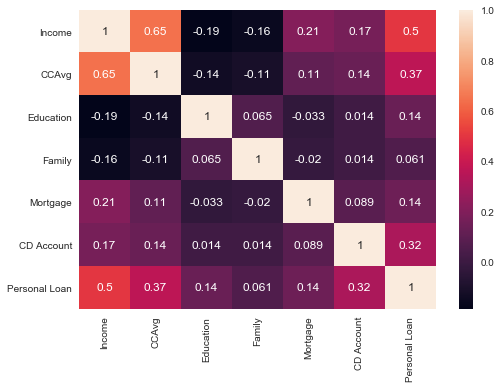

In [649]:
df['Education'] = df['Education'].astype('int64')
df['Family'] = df['Family'].astype('int64')
sns.heatmap(fd[['Income', 'CCAvg', 'Education', 'Family', 'Mortgage', 'CD Account', 'Personal Loan']].corr(), annot=True)

Looking at above analysis, it's evident that we should build the model using following features.
1. Income
2. CCAvg
3. Education
4. Mortgage
5. CD Account

## Some Pivot comparison between Borrowers and Non-Borrowers

In [650]:
df.pivot_table(index='Personal Loan', aggfunc='mean')
# Even this Pivot table tells the same story that features like CCAvg, CD Account, Education, Income, Mortgage
# & additionally Family have distinguished values between borrowers and non-borrowers

,Age,CCAvg,CD Account,CreditCard,Education,Experience,Family,Income,Mortgage,Online,Securities Account
Personal Loan,,,,,,,,,,,
0,45.367257,1.729009,0.035841,0.293584,1.843584,20.132301,2.373451,66.237389,51.789381,0.595796,0.102212
1,45.066667,3.905354,0.291667,0.297917,2.233333,19.843750,2.612500,144.745833,100.845833,0.606250,0.125000


In [651]:
# Dropping the range features added for EDA
df = df.drop(['Age Range', 'Experience Range', 'Income Range'], axis=1)

In [652]:
df['Education'] = df['Education'].astype('category')
df['Family'] = df['Family'].astype('category')

# [Section-B] Common functions

In [653]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [654]:
def model_scores(model_name, y_test, y_pred):
    result = pd.DataFrame(index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
    result[model_name] = [accuracy_score(y_test, y_pred), 
                         recall_score(y_test, y_pred),
                         precision_score(y_test, y_pred),
                         f1_score(y_test, y_pred)]
    return result

In [655]:
def model_scores_cross_validation(model_name, d):
    result = pd.DataFrame(index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
    result[model_name] = [d['test_accuracy'].mean(), 
                          d['test_recall'].mean(),
                          d['test_precision'].mean(),
                          d['test_f1'].mean()]
    return result

# [Section-C] Logistic Regression

In [656]:
# Taking only those features that we identified before (Added )
X = df[['Income', 'CCAvg', 'Education', 'Mortgage', 'CD Account', 'Family']]
X = pd.get_dummies(X, drop_first=True)
X.head()

,Income,CCAvg,Mortgage,CD Account,Education_2,Education_3,Family_2,Family_3,Family_4
0,49,1.6,0,0,0,0,0,0,1
1,34,1.5,0,0,0,0,0,1,0
2,11,1.0,0,0,0,0,0,0,0
3,100,2.7,0,0,1,0,0,0,0
4,45,1.0,0,0,1,0,0,0,1


In [657]:
y = df['Personal Loan']

In [658]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [659]:
model_lr = LogisticRegression(solver='lbfgs', max_iter=400)
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

In [660]:
confusion_matrix(y_test, y_pred)

array([[1334,    9],
       [  50,  107]], dtype=int64)

In [661]:
y_test.head()

1501    0
2586    1
2653    0
1055    0
705     0
Name: Personal Loan, dtype: int64

In [662]:
result_lr = model_scores('Logistic Regression', y_test, y_pred)
result_lr

,Logistic Regression
Accuracy,0.960667
Recall,0.681529
Precision,0.922414
F1 Score,0.783883


### Extra Work - Find the Optimum Threshold

In [663]:
y_pred_prob = model_lr.predict_proba(X_test)

In [664]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [665]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9747404565309151

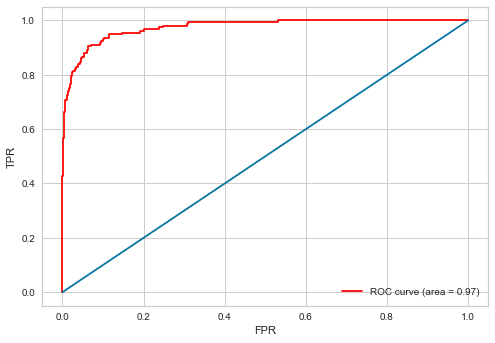

In [666]:
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")

In [667]:
optimumT = 0
optimumF1 = 0
optimumCM = 0

In [668]:
for threshold in thresholds:
    y_pred_new = np.where(y_pred_prob[:,1] > threshold, 1, 0)
    f1 = f1_score(y_test, y_pred_new)
    cm = confusion_matrix(y_test, y_pred_new)
    if (f1 > optimumF1):
        optimumT = threshold
        optimumF1 = f1
        optimumCM = cm

C:\Users\Beejal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Beejal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [669]:
optimumT, optimumF1

(0.3296147422119784, 0.802547770700637)

In [670]:
optimumCM

array([[1312,   31],
       [  31,  126]], dtype=int64)

### Extra Work - Cross Validation

In [671]:
scores = cross_validate(model_lr, X, y, cv=5, scoring=scoring, return_train_score=False)

C:\Users\Beejal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [672]:
result_lr_cv = model_scores_cross_validation('Logistic Regression', scores)
result_lr_cv

,Logistic Regression
Accuracy,0.957200
Recall,0.643750
Precision,0.877837
F1 Score,0.742735


# [Section-D] KNN

In [673]:
model_knn = KNeighborsClassifier(n_neighbors=5)

In [674]:
X = pd.DataFrame(data=df[['Income', 'CCAvg', 'Mortgage', 'CD Account', 'Education', 'Family']])
X['Education'] = X['Education'].cat.codes
X['Family'] = X['Family'].cat.codes

X = X.apply(st.zscore)
X.head()

,Income,CCAvg,Mortgage,CD Account,Education,Family
0,-0.538229,-0.193385,-0.555524,-0.25354,-1.049078,1.397414
1,-0.864109,-0.250611,-0.555524,-0.25354,-1.049078,0.525991
2,-1.363793,-0.536736,-0.555524,-0.25354,-1.049078,-1.216855
3,0.569765,0.436091,-0.555524,-0.25354,0.141703,-1.216855
4,-0.625130,-0.536736,-0.555524,-0.25354,0.141703,1.397414


In [675]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [676]:
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

In [677]:
confusion_matrix(y_pred, y_test)

array([[1338,   43],
       [   5,  114]], dtype=int64)

In [678]:
result_knn = model_scores('KNN with K = 5', y_test, y_pred)
result_knn

,KNN with K = 5
Accuracy,0.968000
Recall,0.726115
Precision,0.957983
F1 Score,0.826087


### Extra Work - Find the best K Value

In [679]:
def build_compare_knn_classifier(klist, X_train, y_train, X_test, y_test):
    result = pd.DataFrame(index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
    for k in klist:
        model_knn = KNeighborsClassifier(n_neighbors=k)
        model_knn.fit(X_train, y_train)
                
        y_pred = model_knn.predict(X_test)
        
        # Just manually doing recall, precision calculation for my future reference
        cm = confusion_matrix(y_test, y_pred)
        recall = np.diag(cm) / np.sum(cm, axis = 1)
        precision = np.diag(cm) / np.sum(cm, axis = 0)
    
        result['K={}'.format(k)] = [accuracy_score(y_test, y_pred), 
                         recall_score(y_test, y_pred),
                         precision_score(y_test, y_pred),
                         f1_score(y_test, y_pred)]
    return result

In [680]:
klist = range(1, 20, 2)
results_knn = build_compare_knn_classifier(klist, X_train, y_train, X_test, y_test)
results_knn
# Looks like K

,K=1,K=3,K=5,K=7,K=9,K=11,K=13,K=15,K=17,K=19
Accuracy,0.976000,0.972667,0.968000,0.966000,0.962000,0.960667,0.959333,0.956000,0.956000,0.956000
Recall,0.847134,0.764331,0.726115,0.694268,0.681529,0.662420,0.643312,0.624204,0.630573,0.630573
Precision,0.917241,0.967742,0.957983,0.973214,0.938596,0.945455,0.952830,0.933333,0.925234,0.925234
F1 Score,0.880795,0.854093,0.826087,0.810409,0.789668,0.779026,0.768061,0.748092,0.750000,0.750000


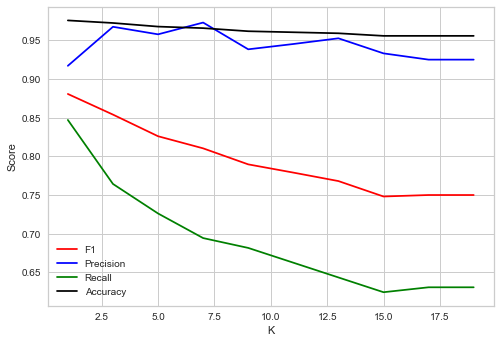

In [681]:
plt.plot(klist, results_knn.loc['F1 Score'], color='red', label="F1")
plt.plot(klist, results_knn.loc['Precision'], color='blue', label="Precision")
plt.plot(klist, results_knn.loc['Recall'], color='green', label="Recall")
plt.plot(klist, results_knn.loc['Accuracy'], color='black', label="Accuracy")
plt.xlabel("K")
plt.ylabel("Score")
plt.legend(loc="lower left")

In [682]:
def build_compare_knn_classifier_kfold_cv(klist, X, y):
    result = pd.DataFrame()
    for k in klist:
        model_knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_validate(model_knn, X, y, cv=10, scoring=scoring)
        res = model_scores_cross_validation('K={}'.format(k), scores)
        result = pd.concat([result, res], axis=1, sort=False)
    return result

In [683]:
klist = range(1, 40, 2)

In [684]:
result_knn_cv = build_compare_knn_classifier_kfold_cv(klist, X, y)
result_knn_cv

,K=1,K=3,K=5,K=7,K=9,K=11,K=13,K=15,K=17,K=19,K=21,K=23,K=25,K=27,K=29,K=31,K=33,K=35,K=37,K=39
Accuracy,0.981000,0.976600,0.972800,0.971600,0.969800,0.967200,0.966000,0.965000,0.963000,0.962600,0.961400,0.960200,0.960000,0.959600,0.958200,0.958600,0.957600,0.957600,0.956800,0.956400
Recall,0.854167,0.791667,0.745833,0.722917,0.708333,0.685417,0.670833,0.660417,0.643750,0.643750,0.631250,0.620833,0.622917,0.622917,0.612500,0.614583,0.606250,0.608333,0.600000,0.593750
Precision,0.945428,0.958484,0.962978,0.976050,0.970368,0.963281,0.965836,0.965133,0.958798,0.953175,0.952035,0.948514,0.941981,0.935781,0.929309,0.932576,0.928570,0.926706,0.925176,0.927249
F1 Score,0.895459,0.866152,0.839626,0.828641,0.816959,0.799037,0.789210,0.780895,0.765837,0.764260,0.755368,0.746379,0.746200,0.744844,0.734458,0.737206,0.730024,0.730836,0.724361,0.720562


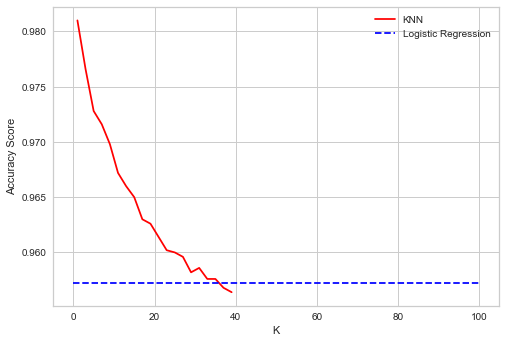

In [685]:
#plt.yscale()
plt.plot(klist, result_knn_cv.loc['Accuracy'], color='red', label="KNN")
plt.plot([0, 100], [0.957200, 0.957200], color='blue', linestyle='dashed', label="Logistic Regression")
plt.xlabel("K")
plt.ylabel("Accuracy Score")
plt.legend(loc="upper right")


In [686]:
parameter={'n_neighbors' : np.arange(1, 50, 2)}
GS=GridSearchCV(model_knn, parameter, cv=5, scoring='f1')
GS.fit(X,y)
GS.best_params_

{'n_neighbors': 1}

# [Section-E] Naive Bayes

In [687]:
model_gnb = GaussianNB()

In [688]:
df1 = pd.DataFrame(data=df[['Income', 'CCAvg', 'Mortgage', 'CD Account', 'Education', 'Family', 'Personal Loan']])
df1['Education'] = df1['Education'].cat.codes
df1['Family'] = df1['Family'].cat.codes
df1.corr()

,Income,CCAvg,Mortgage,CD Account,Education,Family,Personal Loan
Income,1.000000,0.645984,0.206806,0.169738,-0.187524,-0.157501,0.502462
CCAvg,0.645984,1.000000,0.109905,0.136534,-0.136124,-0.109275,0.366889
Mortgage,0.206806,0.109905,1.000000,0.089311,-0.033327,-0.020445,0.142095
CD Account,0.169738,0.136534,0.089311,1.000000,0.013934,0.014110,0.316355
Education,-0.187524,-0.136124,-0.033327,0.013934,1.000000,0.064929,0.136722
Family,-0.157501,-0.109275,-0.020445,0.014110,0.064929,1.000000,0.061367
Personal Loan,0.502462,0.366889,0.142095,0.316355,0.136722,0.061367,1.000000


Following Independent Variables (IV) will stay

1. Income has high correlation with CCAvg. So one of these two should go forward. Among Income and CCAvg, Income is more correlated with Personal Loan than CCAvg. So Income goes forward & CCAvg is dropped.

2. Mortgage doesn't have strong correlation with other IVs. So it also goes forward.

3. CD Account doesn't have strong correlation with other IVs. So it also goes forward.

4. Education doesn't have strong correlation with other IVs. So it also goes forward. 

5. Family doesn't have strong correlation with other IVs. So it also goes forward. 

In [689]:
X = pd.DataFrame(data=df[['Income', 'Mortgage', 'CD Account', 'Education', 'Family']])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Income        5000 non-null int64
Mortgage      5000 non-null int64
CD Account    5000 non-null int64
Education     5000 non-null category
Family        5000 non-null category
dtypes: category(2), int64(3)
memory usage: 127.3 KB


In [690]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model_gnb.fit(X_train, y_train)
y_pred = model_gnb.predict(X_test)

In [691]:
confusion_matrix(y_pred, y_test)

array([[1277,   80],
       [  66,   77]], dtype=int64)

In [692]:
model_scores("GaussianNB", y_test, y_pred)

,GaussianNB
Accuracy,0.902667
Recall,0.490446
Precision,0.538462
F1 Score,0.513333


### Extra Work - Cross Validation

In [693]:
scores = cross_validate(model_gnb, X, y, cv=5, scoring=scoring, return_train_score=False)
result_gnb_cv = model_scores_cross_validation('GaussianNB', scores)
result_gnb_cv

,GaussianNB
Accuracy,0.901800
Recall,0.485417
Precision,0.487698
F1 Score,0.486382


# [Section-F] Comparison between 3 Models

In [694]:
final_result = pd.DataFrame()
final_result = pd.concat([result_lr_cv, result_knn_cv['K=1'], result_knn_cv['K=3'], result_knn_cv['K=5'], result_knn_cv['K=7'], result_gnb_cv], axis=1, sort=False)
final_result

,Logistic Regression,K=1,K=3,K=5,K=7,GaussianNB
Accuracy,0.957200,0.981000,0.976600,0.972800,0.971600,0.901800
Recall,0.643750,0.854167,0.791667,0.745833,0.722917,0.485417
Precision,0.877837,0.945428,0.958484,0.962978,0.976050,0.487698
F1 Score,0.742735,0.895459,0.866152,0.839626,0.828641,0.486382


#### Conclusion: 

Using Cross Validation resampling method, the three models have been compared against multiple matrices like Accuracy, 
Recall, Precision and F1 Score. Clearly KNN gives the best result across these matrices. KNN performs better because it's  naturally realted to the problem statement. People coming from similar financial background are bound to go for Personal Loans.